## Loading an audio file

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
import librosa
audio_path = '../T08-violin.wav'

x , sr = librosa.load(audio_path)



## Playing Audio
Using IPython.display.Audio, to play the audio

In [15]:
import IPython.display as ipd
ipd.Audio(audio_path)

You can even use an mp3 or a WMA format for the audio example.

## Visualizing Audio

### Waveform
We can plot the audio array using librosa.display.waveplot:


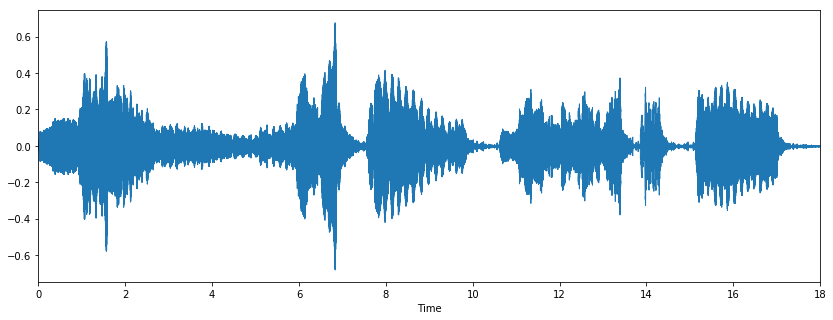

In [45]:
%matplotlib inline
import sklearn
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

Here, we have the plot the amplitude envelope of a waveform.

### Spectrogram
We can also display a spectrogram using librosa.display.specshow.

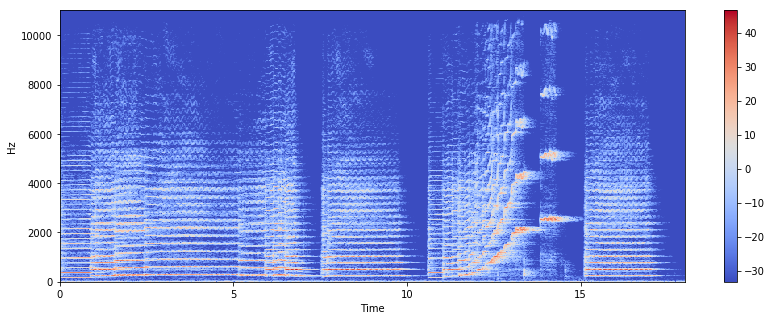

In [20]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

### Log Frequency axis

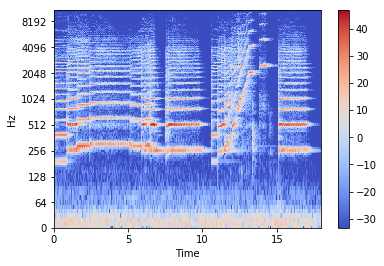

In [21]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

## Creating an audio signal
Let us now create an audio signal at 220Hz. We know an audio signal is a numpy array, so we shall create one and pass it on to the audio function.


In [22]:
import numpy as np
sr = 22050 # sample rate
T = 5.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz


## Playing the sound


In [24]:
ipd.Audio(x, rate=sr) # load a NumPy array

## Saving the signal


In [67]:
librosa.output.write_wav('../tone_440.wav', x, sr)

# Feature Extraction

In [68]:
x, sr = librosa.load('../T08-violin.wav')
ipd.Audio(x, rate=sr)

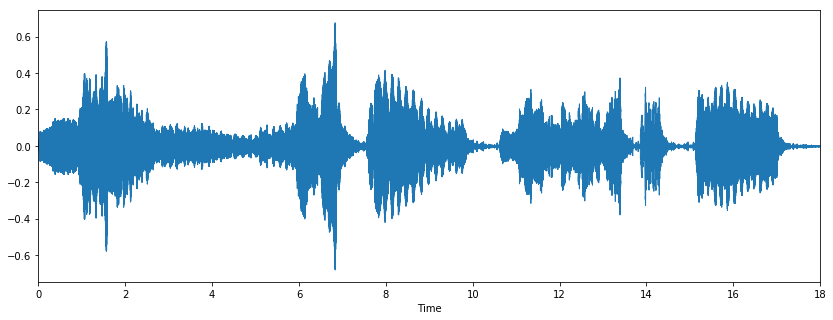

In [69]:
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

## 1. Zero Crossing Rate

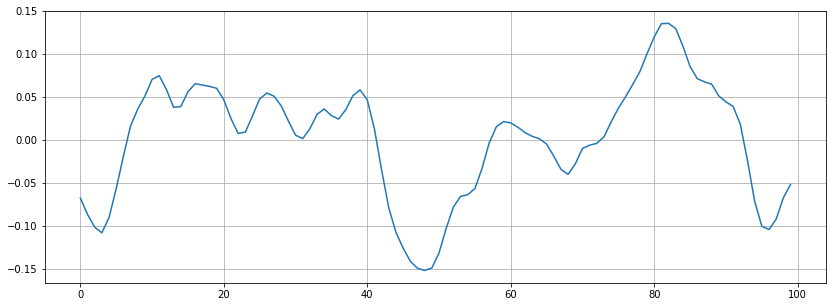

In [37]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

I count 6 zero crossings. Let's compute the zero crossings using librosa.

In [38]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
zero_crossings.shape

(100,)

In [39]:
print(sum(zero_crossings))

6


## 2.Spectral Centroid

In [43]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

(775,)

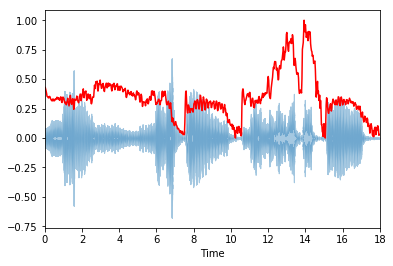

In [46]:
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

## 3.Spectral Rolloff 

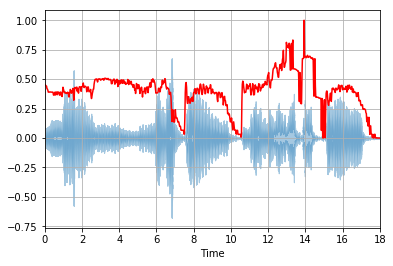

In [71]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.grid()

## 4.MFCC

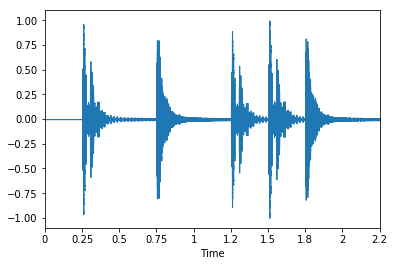

In [57]:
x, fs = librosa.load('../simple_loop.wav')
librosa.display.waveplot(x, sr=sr)

(20, 97)


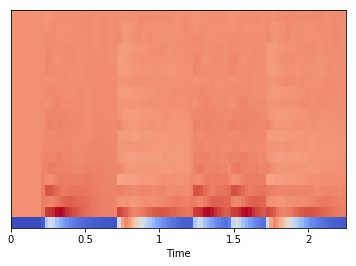

In [60]:
# MFCC
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sr, x_axis='time')

## Feature Scaling
Let's scale the MFCCs such that each coefficient dimension has zero mean and unit variance:

In [61]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

[ 3.52524424e-16 -5.37943115e-17  4.72130925e-17  4.76136885e-16
 -2.40357562e-17  7.43963882e-17  6.81013092e-17 -6.52399097e-17
  2.77555756e-17  6.40953499e-17  7.67570429e-17  1.50223476e-16
  6.75290293e-17  8.69865463e-17 -8.24083070e-17 -4.74992325e-17
  7.35379684e-17 -3.25913409e-16  2.80417156e-17 -4.14330655e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


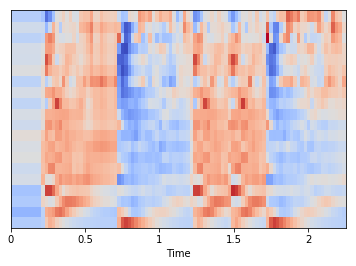

In [62]:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

## Chroma Frequencies

In [75]:
# Loadign the file
x, sr = librosa.load('../simple_piano.wav')
ipd.Audio(x, rate=sr)

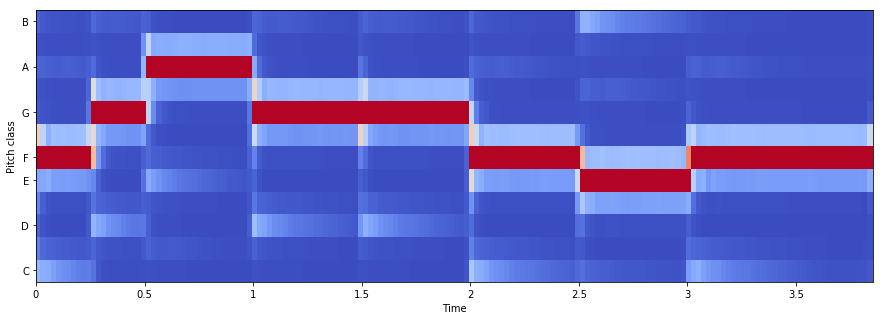

In [76]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')